In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv("Diabetes Database.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Text(0.5, 1.0, 'Count of target variable')

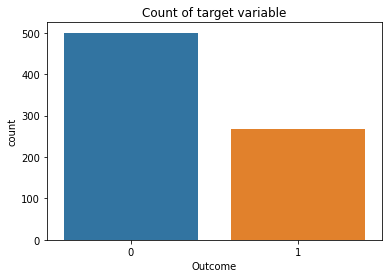

In [5]:
sns.countplot(df["Outcome"])
plt.title("Count of target variable")

Text(0.5, 1.0, 'Correlation Heat-Map')

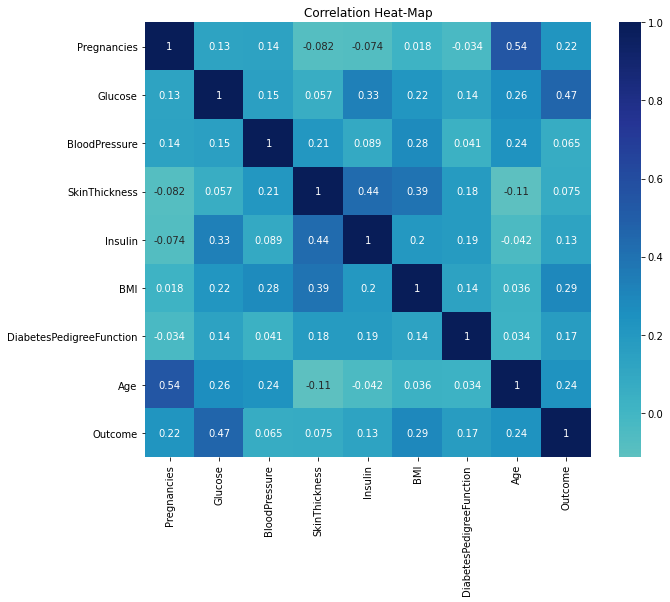

In [6]:
plt.figure(figsize=(10,8)),
sns.heatmap(df.corr(),annot=True,center=0,  cmap="YlGnBu")
plt.title("Correlation Heat-Map")

In [7]:
#Oversampling the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df.drop(['Outcome'],axis='columns'), df['Outcome'])

In [8]:
#Creating a new Oversampling Data Frame
df_oversampled = pd.DataFrame(X)

In [9]:
df_oversampled['Outcome'] = y

Text(0.5, 1.0, 'Count of target variable')

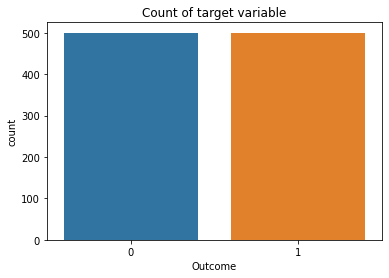

In [10]:
sns.countplot(df_oversampled["Outcome"])
plt.title("Count of target variable")

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_oversampled.drop(['Outcome'],axis='columns'),df_oversampled['Outcome'], test_size=0.20)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df_oversampled.drop("Outcome",axis=1)),columns=df_oversampled.drop("Outcome",axis=1).columns)

In [14]:
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.617680,0.687773,0.135948,0.862879,-0.713329,0.100734,0.398690,1.384077
1,-0.879364,-1.243571,-0.164490,0.492862,-0.713329,-0.819025,-0.423811,-0.264357
2,1.216498,1.760742,-0.264636,-1.295552,-0.713329,-1.252625,0.532794,-0.177597
3,-0.879364,-1.120946,-0.164490,0.122846,0.052754,-0.621934,-0.972146,-1.131954
4,-1.178773,0.350554,-1.466389,0.862879,0.655840,1.348977,5.348600,-0.090837
...,...,...,...,...,...,...,...,...
995,0.018863,1.362210,0.436387,0.061176,0.639540,-0.475350,1.049002,1.470837
996,0.617680,-0.691758,-0.214563,0.677871,-0.713329,0.776833,-0.464035,-0.264357
997,-1.178773,1.576804,0.536533,1.479573,3.654972,1.330634,-0.268492,-0.698155
998,0.018863,0.565148,-0.114417,-1.295552,-0.713329,0.425953,-0.846084,0.082682


In [15]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

In [16]:

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [5,10,20,50],
            "criterion":['gini','entropy'],
            'min_samples_split':[2,3,4],
            
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,20]
        }
    },
 
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
    
    'SGD':{
        'model': SGDClassifier(),
        'params':{
            'loss':["hinge","modified_huber","log"],
            'penalty':["l2","l1","elasticnet"]
        }
    },
     
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [x for x in range(5,20)],
            'leaf_size':[10,20,30,40,50,60],
        }
    }  
}

In [17]:
from sklearn.model_selection import GridSearchCV
scores = []

# for model_name, mp in model_params.items():
model_name = 'random_forest'
mp = model_params['random_forest']
clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,verbose=10,n_jobs=1,scoring=['roc_auc','accuracy','precision','recall','f1'], refit='f1')
clf.fit(X_train, y_train)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})
    
# model_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START criterion=gini, min_samples_split=2, n_estimators=5........
[CV 1/5; 1/24] END criterion=gini, min_samples_split=2, n_estimators=5; accuracy: (test=0.769) f1: (test=0.770) precision: (test=0.765) recall: (test=0.775) roc_auc: (test=0.839) total time=   0.0s
[CV 2/5; 1/24] START criterion=gini, min_samples_split=2, n_estimators=5........
[CV 2/5; 1/24] END criterion=gini, min_samples_split=2, n_estimators=5; accuracy: (test=0.762) f1: (test=0.765) precision: (test=0.756) recall: (test=0.775) roc_auc: (test=0.823) total time=   0.0s
[CV 3/5; 1/24] START criterion=gini, min_samples_split=2, n_estimators=5........
[CV 3/5; 1/24] END criterion=gini, min_samples_split=2, n_estimators=5; accuracy: (test=0.725) f1: (test=0.732) precision: (test=0.714) recall: (test=0.750) roc_auc: (test=0.806) total time=   0.0s
[CV 4/5; 1/24] START criterion=gini, min_samples_split=2, n_estimators=5........
[CV 4/5; 1/24] END c

[CV 1/5; 7/24] END criterion=gini, min_samples_split=3, n_estimators=20; accuracy: (test=0.794) f1: (test=0.805) precision: (test=0.764) recall: (test=0.850) roc_auc: (test=0.868) total time=   0.0s
[CV 2/5; 7/24] START criterion=gini, min_samples_split=3, n_estimators=20.......
[CV 2/5; 7/24] END criterion=gini, min_samples_split=3, n_estimators=20; accuracy: (test=0.738) f1: (test=0.741) precision: (test=0.732) recall: (test=0.750) roc_auc: (test=0.842) total time=   0.0s
[CV 3/5; 7/24] START criterion=gini, min_samples_split=3, n_estimators=20.......
[CV 3/5; 7/24] END criterion=gini, min_samples_split=3, n_estimators=20; accuracy: (test=0.794) f1: (test=0.805) precision: (test=0.764) recall: (test=0.850) roc_auc: (test=0.859) total time=   0.0s
[CV 4/5; 7/24] START criterion=gini, min_samples_split=3, n_estimators=20.......
[CV 4/5; 7/24] END criterion=gini, min_samples_split=3, n_estimators=20; accuracy: (test=0.769) f1: (test=0.767) precision: (test=0.772) recall: (test=0.762) ro

[CV 5/5; 13/24] END criterion=entropy, min_samples_split=2, n_estimators=5; accuracy: (test=0.787) f1: (test=0.787) precision: (test=0.778) recall: (test=0.797) roc_auc: (test=0.850) total time=   0.0s
[CV 1/5; 14/24] START criterion=entropy, min_samples_split=2, n_estimators=10...
[CV 1/5; 14/24] END criterion=entropy, min_samples_split=2, n_estimators=10; accuracy: (test=0.781) f1: (test=0.768) precision: (test=0.817) recall: (test=0.725) roc_auc: (test=0.848) total time=   0.0s
[CV 2/5; 14/24] START criterion=entropy, min_samples_split=2, n_estimators=10...
[CV 2/5; 14/24] END criterion=entropy, min_samples_split=2, n_estimators=10; accuracy: (test=0.794) f1: (test=0.790) precision: (test=0.805) recall: (test=0.775) roc_auc: (test=0.844) total time=   0.0s
[CV 3/5; 14/24] START criterion=entropy, min_samples_split=2, n_estimators=10...
[CV 3/5; 14/24] END criterion=entropy, min_samples_split=2, n_estimators=10; accuracy: (test=0.775) f1: (test=0.763) precision: (test=0.806) recall: 

[CV 4/5; 19/24] END criterion=entropy, min_samples_split=3, n_estimators=20; accuracy: (test=0.787) f1: (test=0.793) precision: (test=0.774) recall: (test=0.812) roc_auc: (test=0.853) total time=   0.0s
[CV 5/5; 19/24] START criterion=entropy, min_samples_split=3, n_estimators=20...
[CV 5/5; 19/24] END criterion=entropy, min_samples_split=3, n_estimators=20; accuracy: (test=0.806) f1: (test=0.810) precision: (test=0.786) recall: (test=0.835) roc_auc: (test=0.899) total time=   0.0s
[CV 1/5; 20/24] START criterion=entropy, min_samples_split=3, n_estimators=50...
[CV 1/5; 20/24] END criterion=entropy, min_samples_split=3, n_estimators=50; accuracy: (test=0.775) f1: (test=0.783) precision: (test=0.756) recall: (test=0.812) roc_auc: (test=0.876) total time=   0.1s
[CV 2/5; 20/24] START criterion=entropy, min_samples_split=3, n_estimators=50...
[CV 2/5; 20/24] END criterion=entropy, min_samples_split=3, n_estimators=50; accuracy: (test=0.794) f1: (test=0.807) precision: (test=0.758) recall:

In [18]:
model_name = 'logistic_regression'
mp = model_params['logistic_regression']
clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,verbose=10,n_jobs=1,scoring=['roc_auc','accuracy','precision','recall','f1'], refit='f1')
clf.fit(X_train, y_train)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})
   

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START C=1.........................................................
[CV 1/5; 1/4] END C=1; accuracy: (test=0.775) f1: (test=0.766) precision: (test=0.797) recall: (test=0.738) roc_auc: (test=0.847) total time=   0.0s
[CV 2/5; 1/4] START C=1.........................................................
[CV 2/5; 1/4] END C=1; accuracy: (test=0.769) f1: (test=0.776) precision: (test=0.753) recall: (test=0.800) roc_auc: (test=0.838) total time=   0.0s
[CV 3/5; 1/4] START C=1.........................................................
[CV 3/5; 1/4] END C=1; accuracy: (test=0.738) f1: (test=0.734) precision: (test=0.744) recall: (test=0.725) roc_auc: (test=0.835) total time=   0.0s
[CV 4/5; 1/4] START C=1.........................................................
[CV 4/5; 1/4] END C=1; accuracy: (test=0.744) f1: (test=0.735) precision: (test=0.760) recall: (test=0.713) roc_auc: (test=0.810) total time=   0.0s
[CV 5/5; 1/4] START 

In [19]:
# model_name = 'svm'
# mp = model_params['svm']
# clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,verbose=10,n_jobs=1,scoring=['roc_auc','accuracy','precision','recall','f1'], refit='f1')
# clf.fit(X_train, y_train)
# scores.append({
#     'model': model_name,
#     'best_score': clf.best_score_,
#     'best_params': clf.best_params_
# })

In [20]:
model_name = 'KNN'
mp = model_params['KNN']
clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,verbose=10,n_jobs=1,scoring=['roc_auc','accuracy','precision','recall','f1'], refit='f1')
clf.fit(X_train, y_train)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 1/90] START leaf_size=10, n_neighbors=5................................
[CV 1/5; 1/90] END leaf_size=10, n_neighbors=5; accuracy: (test=0.769) f1: (test=0.789) precision: (test=0.726) recall: (test=0.863) roc_auc: (test=0.805) total time=   0.0s
[CV 2/5; 1/90] START leaf_size=10, n_neighbors=5................................
[CV 2/5; 1/90] END leaf_size=10, n_neighbors=5; accuracy: (test=0.700) f1: (test=0.724) precision: (test=0.670) recall: (test=0.787) roc_auc: (test=0.786) total time=   0.0s
[CV 3/5; 1/90] START leaf_size=10, n_neighbors=5................................
[CV 3/5; 1/90] END leaf_size=10, n_neighbors=5; accuracy: (test=0.762) f1: (test=0.768) precision: (test=0.750) recall: (test=0.787) roc_auc: (test=0.829) total time=   0.0s
[CV 4/5; 1/90] START leaf_size=10, n_neighbors=5................................
[CV 4/5; 1/90] END leaf_size=10, n_neighbors=5; accuracy: (test=0.713) f1: (test=0.723) prec

[CV 1/5; 8/90] END leaf_size=10, n_neighbors=12; accuracy: (test=0.719) f1: (test=0.734) precision: (test=0.697) recall: (test=0.775) roc_auc: (test=0.804) total time=   0.0s
[CV 2/5; 8/90] START leaf_size=10, n_neighbors=12...............................
[CV 2/5; 8/90] END leaf_size=10, n_neighbors=12; accuracy: (test=0.694) f1: (test=0.713) precision: (test=0.670) recall: (test=0.762) roc_auc: (test=0.778) total time=   0.0s
[CV 3/5; 8/90] START leaf_size=10, n_neighbors=12...............................
[CV 3/5; 8/90] END leaf_size=10, n_neighbors=12; accuracy: (test=0.738) f1: (test=0.731) precision: (test=0.750) recall: (test=0.713) roc_auc: (test=0.824) total time=   0.0s
[CV 4/5; 8/90] START leaf_size=10, n_neighbors=12...............................
[CV 4/5; 8/90] END leaf_size=10, n_neighbors=12; accuracy: (test=0.762) f1: (test=0.753) precision: (test=0.784) recall: (test=0.725) roc_auc: (test=0.823) total time=   0.0s
[CV 5/5; 8/90] START leaf_size=10, n_neighbors=12........

[CV 4/5; 14/90] END leaf_size=10, n_neighbors=18; accuracy: (test=0.756) f1: (test=0.758) precision: (test=0.753) recall: (test=0.762) roc_auc: (test=0.824) total time=   0.0s
[CV 5/5; 14/90] START leaf_size=10, n_neighbors=18..............................
[CV 5/5; 14/90] END leaf_size=10, n_neighbors=18; accuracy: (test=0.762) f1: (test=0.762) precision: (test=0.753) recall: (test=0.772) roc_auc: (test=0.863) total time=   0.0s
[CV 1/5; 15/90] START leaf_size=10, n_neighbors=19..............................
[CV 1/5; 15/90] END leaf_size=10, n_neighbors=19; accuracy: (test=0.719) f1: (test=0.734) precision: (test=0.697) recall: (test=0.775) roc_auc: (test=0.820) total time=   0.0s
[CV 2/5; 15/90] START leaf_size=10, n_neighbors=19..............................
[CV 2/5; 15/90] END leaf_size=10, n_neighbors=19; accuracy: (test=0.675) f1: (test=0.708) precision: (test=0.643) recall: (test=0.787) roc_auc: (test=0.781) total time=   0.0s
[CV 3/5; 15/90] START leaf_size=10, n_neighbors=19...

[CV 4/5; 21/90] END leaf_size=20, n_neighbors=10; accuracy: (test=0.762) f1: (test=0.756) precision: (test=0.776) recall: (test=0.738) roc_auc: (test=0.834) total time=   0.0s
[CV 5/5; 21/90] START leaf_size=20, n_neighbors=10..............................
[CV 5/5; 21/90] END leaf_size=20, n_neighbors=10; accuracy: (test=0.775) f1: (test=0.766) precision: (test=0.787) recall: (test=0.747) roc_auc: (test=0.864) total time=   0.0s
[CV 1/5; 22/90] START leaf_size=20, n_neighbors=11..............................
[CV 1/5; 22/90] END leaf_size=20, n_neighbors=11; accuracy: (test=0.719) f1: (test=0.737) precision: (test=0.692) recall: (test=0.787) roc_auc: (test=0.811) total time=   0.0s
[CV 2/5; 22/90] START leaf_size=20, n_neighbors=11..............................
[CV 2/5; 22/90] END leaf_size=20, n_neighbors=11; accuracy: (test=0.688) f1: (test=0.716) precision: (test=0.656) recall: (test=0.787) roc_auc: (test=0.780) total time=   0.0s
[CV 3/5; 22/90] START leaf_size=20, n_neighbors=11...

[CV 3/5; 28/90] END leaf_size=20, n_neighbors=17; accuracy: (test=0.700) f1: (test=0.727) precision: (test=0.667) recall: (test=0.800) roc_auc: (test=0.818) total time=   0.0s
[CV 4/5; 28/90] START leaf_size=20, n_neighbors=17..............................
[CV 4/5; 28/90] END leaf_size=20, n_neighbors=17; accuracy: (test=0.744) f1: (test=0.748) precision: (test=0.735) recall: (test=0.762) roc_auc: (test=0.822) total time=   0.0s
[CV 5/5; 28/90] START leaf_size=20, n_neighbors=17..............................
[CV 5/5; 28/90] END leaf_size=20, n_neighbors=17; accuracy: (test=0.762) f1: (test=0.765) precision: (test=0.747) recall: (test=0.785) roc_auc: (test=0.864) total time=   0.0s
[CV 1/5; 29/90] START leaf_size=20, n_neighbors=18..............................
[CV 1/5; 29/90] END leaf_size=20, n_neighbors=18; accuracy: (test=0.725) f1: (test=0.732) precision: (test=0.714) recall: (test=0.750) roc_auc: (test=0.816) total time=   0.0s
[CV 2/5; 29/90] START leaf_size=20, n_neighbors=18...

[CV 4/5; 35/90] END leaf_size=30, n_neighbors=9; accuracy: (test=0.731) f1: (test=0.733) precision: (test=0.728) recall: (test=0.738) roc_auc: (test=0.834) total time=   0.0s
[CV 5/5; 35/90] START leaf_size=30, n_neighbors=9...............................
[CV 5/5; 35/90] END leaf_size=30, n_neighbors=9; accuracy: (test=0.762) f1: (test=0.771) precision: (test=0.736) recall: (test=0.810) roc_auc: (test=0.861) total time=   0.0s
[CV 1/5; 36/90] START leaf_size=30, n_neighbors=10..............................
[CV 1/5; 36/90] END leaf_size=30, n_neighbors=10; accuracy: (test=0.750) f1: (test=0.756) precision: (test=0.738) recall: (test=0.775) roc_auc: (test=0.808) total time=   0.0s
[CV 2/5; 36/90] START leaf_size=30, n_neighbors=10..............................
[CV 2/5; 36/90] END leaf_size=30, n_neighbors=10; accuracy: (test=0.669) f1: (test=0.694) precision: (test=0.645) recall: (test=0.750) roc_auc: (test=0.760) total time=   0.0s
[CV 3/5; 36/90] START leaf_size=30, n_neighbors=10.....

[CV 4/5; 42/90] END leaf_size=30, n_neighbors=16; accuracy: (test=0.731) f1: (test=0.730) precision: (test=0.734) recall: (test=0.725) roc_auc: (test=0.813) total time=   0.0s
[CV 5/5; 42/90] START leaf_size=30, n_neighbors=16..............................
[CV 5/5; 42/90] END leaf_size=30, n_neighbors=16; accuracy: (test=0.762) f1: (test=0.762) precision: (test=0.753) recall: (test=0.772) roc_auc: (test=0.858) total time=   0.0s
[CV 1/5; 43/90] START leaf_size=30, n_neighbors=17..............................
[CV 1/5; 43/90] END leaf_size=30, n_neighbors=17; accuracy: (test=0.738) f1: (test=0.750) precision: (test=0.716) recall: (test=0.787) roc_auc: (test=0.816) total time=   0.0s
[CV 2/5; 43/90] START leaf_size=30, n_neighbors=17..............................
[CV 2/5; 43/90] END leaf_size=30, n_neighbors=17; accuracy: (test=0.700) f1: (test=0.730) precision: (test=0.663) recall: (test=0.812) roc_auc: (test=0.778) total time=   0.0s
[CV 3/5; 43/90] START leaf_size=30, n_neighbors=17...

[CV 1/5; 50/90] END leaf_size=40, n_neighbors=9; accuracy: (test=0.719) f1: (test=0.734) precision: (test=0.697) recall: (test=0.775) roc_auc: (test=0.804) total time=   0.0s
[CV 2/5; 50/90] START leaf_size=40, n_neighbors=9...............................
[CV 2/5; 50/90] END leaf_size=40, n_neighbors=9; accuracy: (test=0.669) f1: (test=0.694) precision: (test=0.645) recall: (test=0.750) roc_auc: (test=0.762) total time=   0.0s
[CV 3/5; 50/90] START leaf_size=40, n_neighbors=9...............................
[CV 3/5; 50/90] END leaf_size=40, n_neighbors=9; accuracy: (test=0.725) f1: (test=0.735) precision: (test=0.709) recall: (test=0.762) roc_auc: (test=0.815) total time=   0.0s
[CV 4/5; 50/90] START leaf_size=40, n_neighbors=9...............................
[CV 4/5; 50/90] END leaf_size=40, n_neighbors=9; accuracy: (test=0.731) f1: (test=0.733) precision: (test=0.728) recall: (test=0.738) roc_auc: (test=0.834) total time=   0.0s
[CV 5/5; 50/90] START leaf_size=40, n_neighbors=9........

[CV 5/5; 56/90] END leaf_size=40, n_neighbors=15; accuracy: (test=0.744) f1: (test=0.748) precision: (test=0.726) recall: (test=0.772) roc_auc: (test=0.861) total time=   0.0s
[CV 1/5; 57/90] START leaf_size=40, n_neighbors=16..............................
[CV 1/5; 57/90] END leaf_size=40, n_neighbors=16; accuracy: (test=0.731) f1: (test=0.736) precision: (test=0.723) recall: (test=0.750) roc_auc: (test=0.814) total time=   0.0s
[CV 2/5; 57/90] START leaf_size=40, n_neighbors=16..............................
[CV 2/5; 57/90] END leaf_size=40, n_neighbors=16; accuracy: (test=0.713) f1: (test=0.729) precision: (test=0.689) recall: (test=0.775) roc_auc: (test=0.777) total time=   0.0s
[CV 3/5; 57/90] START leaf_size=40, n_neighbors=16..............................
[CV 3/5; 57/90] END leaf_size=40, n_neighbors=16; accuracy: (test=0.719) f1: (test=0.727) precision: (test=0.706) recall: (test=0.750) roc_auc: (test=0.822) total time=   0.0s
[CV 4/5; 57/90] START leaf_size=40, n_neighbors=16...

[CV 3/5; 63/90] END leaf_size=50, n_neighbors=7; accuracy: (test=0.756) f1: (test=0.769) precision: (test=0.730) recall: (test=0.812) roc_auc: (test=0.844) total time=   0.0s
[CV 4/5; 63/90] START leaf_size=50, n_neighbors=7...............................
[CV 4/5; 63/90] END leaf_size=50, n_neighbors=7; accuracy: (test=0.731) f1: (test=0.733) precision: (test=0.728) recall: (test=0.738) roc_auc: (test=0.828) total time=   0.0s
[CV 5/5; 63/90] START leaf_size=50, n_neighbors=7...............................
[CV 5/5; 63/90] END leaf_size=50, n_neighbors=7; accuracy: (test=0.750) f1: (test=0.756) precision: (test=0.729) recall: (test=0.785) roc_auc: (test=0.852) total time=   0.0s
[CV 1/5; 64/90] START leaf_size=50, n_neighbors=8...............................
[CV 1/5; 64/90] END leaf_size=50, n_neighbors=8; accuracy: (test=0.706) f1: (test=0.708) precision: (test=0.704) recall: (test=0.713) roc_auc: (test=0.794) total time=   0.0s
[CV 2/5; 64/90] START leaf_size=50, n_neighbors=8........

[CV 5/5; 69/90] END leaf_size=50, n_neighbors=13; accuracy: (test=0.750) f1: (test=0.753) precision: (test=0.735) recall: (test=0.772) roc_auc: (test=0.864) total time=   0.0s
[CV 1/5; 70/90] START leaf_size=50, n_neighbors=14..............................
[CV 1/5; 70/90] END leaf_size=50, n_neighbors=14; accuracy: (test=0.731) f1: (test=0.743) precision: (test=0.713) recall: (test=0.775) roc_auc: (test=0.804) total time=   0.0s
[CV 2/5; 70/90] START leaf_size=50, n_neighbors=14..............................
[CV 2/5; 70/90] END leaf_size=50, n_neighbors=14; accuracy: (test=0.688) f1: (test=0.706) precision: (test=0.667) recall: (test=0.750) roc_auc: (test=0.776) total time=   0.0s
[CV 3/5; 70/90] START leaf_size=50, n_neighbors=14..............................
[CV 3/5; 70/90] END leaf_size=50, n_neighbors=14; accuracy: (test=0.738) f1: (test=0.744) precision: (test=0.726) recall: (test=0.762) roc_auc: (test=0.819) total time=   0.0s
[CV 4/5; 70/90] START leaf_size=50, n_neighbors=14...

[CV 5/5; 76/90] END leaf_size=60, n_neighbors=5; accuracy: (test=0.769) f1: (test=0.776) precision: (test=0.744) recall: (test=0.810) roc_auc: (test=0.849) total time=   0.0s
[CV 1/5; 77/90] START leaf_size=60, n_neighbors=6...............................
[CV 1/5; 77/90] END leaf_size=60, n_neighbors=6; accuracy: (test=0.731) f1: (test=0.739) precision: (test=0.718) recall: (test=0.762) roc_auc: (test=0.796) total time=   0.0s
[CV 2/5; 77/90] START leaf_size=60, n_neighbors=6...............................
[CV 2/5; 77/90] END leaf_size=60, n_neighbors=6; accuracy: (test=0.681) f1: (test=0.691) precision: (test=0.671) recall: (test=0.713) roc_auc: (test=0.769) total time=   0.0s
[CV 3/5; 77/90] START leaf_size=60, n_neighbors=6...............................
[CV 3/5; 77/90] END leaf_size=60, n_neighbors=6; accuracy: (test=0.738) f1: (test=0.720) precision: (test=0.771) recall: (test=0.675) roc_auc: (test=0.849) total time=   0.0s
[CV 4/5; 77/90] START leaf_size=60, n_neighbors=6........

[CV 5/5; 83/90] END leaf_size=60, n_neighbors=12; accuracy: (test=0.731) f1: (test=0.719) precision: (test=0.743) recall: (test=0.696) roc_auc: (test=0.864) total time=   0.0s
[CV 1/5; 84/90] START leaf_size=60, n_neighbors=13..............................
[CV 1/5; 84/90] END leaf_size=60, n_neighbors=13; accuracy: (test=0.731) f1: (test=0.751) precision: (test=0.699) recall: (test=0.812) roc_auc: (test=0.804) total time=   0.0s
[CV 2/5; 84/90] START leaf_size=60, n_neighbors=13..............................
[CV 2/5; 84/90] END leaf_size=60, n_neighbors=13; accuracy: (test=0.694) f1: (test=0.723) precision: (test=0.660) recall: (test=0.800) roc_auc: (test=0.782) total time=   0.0s
[CV 3/5; 84/90] START leaf_size=60, n_neighbors=13..............................
[CV 3/5; 84/90] END leaf_size=60, n_neighbors=13; accuracy: (test=0.719) f1: (test=0.737) precision: (test=0.692) recall: (test=0.787) roc_auc: (test=0.820) total time=   0.0s
[CV 4/5; 84/90] START leaf_size=60, n_neighbors=13...

[CV 4/5; 90/90] START leaf_size=60, n_neighbors=19..............................
[CV 4/5; 90/90] END leaf_size=60, n_neighbors=19; accuracy: (test=0.744) f1: (test=0.754) precision: (test=0.724) recall: (test=0.787) roc_auc: (test=0.820) total time=   0.0s
[CV 5/5; 90/90] START leaf_size=60, n_neighbors=19..............................
[CV 5/5; 90/90] END leaf_size=60, n_neighbors=19; accuracy: (test=0.756) f1: (test=0.761) precision: (test=0.738) recall: (test=0.785) roc_auc: (test=0.865) total time=   0.0s


In [21]:
model_name = 'SGD'
mp = model_params['SGD']
clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,verbose=10,n_jobs=1, scoring=['roc_auc','accuracy','precision','recall','f1'], refit='f1')
clf.fit(X_train, y_train)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START loss=hinge, penalty=l2......................................
[CV 1/5; 1/9] END loss=hinge, penalty=l2; accuracy: (test=0.506) f1: (test=0.667) precision: (test=0.503) recall: (test=0.988) roc_auc: (test=0.699) total time=   0.1s
[CV 2/5; 1/9] START loss=hinge, penalty=l2......................................
[CV 2/5; 1/9] END loss=hinge, penalty=l2; accuracy: (test=0.537) f1: (test=0.196) precision: (test=0.750) recall: (test=0.113) roc_auc: (test=0.672) total time=   0.0s
[CV 3/5; 1/9] START loss=hinge, penalty=l2......................................
[CV 3/5; 1/9] END loss=hinge, penalty=l2; accuracy: (test=0.600) f1: (test=0.704) precision: (test=0.559) recall: (test=0.950) roc_auc: (test=0.694) total time=   0.0s
[CV 4/5; 1/9] START loss=hinge, penalty=l2......................................
[CV 4/5; 1/9] END loss=hinge, penalty=l2; accuracy: (test=0.575) f1: (test=0.676) precision: (test=0.546) recall

[CV 4/5; 7/9] END loss=log, penalty=l2; accuracy: (test=0.512) f1: (test=0.093) precision: (test=0.667) recall: (test=0.050) roc_auc: (test=0.508) total time=   0.0s
[CV 5/5; 7/9] START loss=log, penalty=l2........................................
[CV 5/5; 7/9] END loss=log, penalty=l2; accuracy: (test=0.500) f1: (test=0.664) precision: (test=0.497) recall: (test=1.000) roc_auc: (test=0.681) total time=   0.0s
[CV 1/5; 8/9] START loss=log, penalty=l1........................................
[CV 1/5; 8/9] END loss=log, penalty=l1; accuracy: (test=0.519) f1: (test=0.672) precision: (test=0.510) recall: (test=0.988) roc_auc: (test=0.769) total time=   0.0s
[CV 2/5; 8/9] START loss=log, penalty=l1........................................
[CV 2/5; 8/9] END loss=log, penalty=l1; accuracy: (test=0.519) f1: (test=0.094) precision: (test=0.800) recall: (test=0.050) roc_auc: (test=0.632) total time=   0.0s
[CV 3/5; 8/9] START loss=log, penalty=l1........................................
[CV 3/5; 8/9

In [22]:
model_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [23]:
model_results

,model,best_score,best_params
0,random_forest,0.812899,"{'criterion': 'gini', 'min_samples_split': 4, ..."
1,logistic_regression,0.758345,{'C': 5}
2,KNN,0.755930,"{'leaf_size': 10, 'n_neighbors': 5}"
3,SGD,0.610911,"{'loss': 'modified_huber', 'penalty': 'l1'}"
